# Predicting Concrete Compressive Strength Using Random Forest Regression
---
## 1. Problem Definition
Concrete is one of the most widely used materials in construction, and its compressive strength determines the quality, durability, and safety of structures. Traditionally, the strength of concrete is determined through laboratory testing, which is time-consuming, costly, and dependent on curing time.

In this project, the goal is to develop a predictive model that can accurately estimate the compressive strength (in MPa) of concrete based on its mixture components and age. By using Random Forest Regression, we aim to capture the nonlinear relationships between input variables such as cement, water, aggregates, and other admixtures, to produce reliable predictions.

### Objectives
- To build a regression model that predicts concrete compressive strength using machine learning.
- To analyze the influence of different ingredients (cement, slag, fly ash, etc.) on concrete strength.
- To reduce reliance on physical testing by providing a faster, data-driven alternative.
---


## 2. Data Collection
The dataset used in this project is the Concrete Compressive Strength Dataset, which is publicly available from Kaggle. It contains 1,030 instances and 9 quantitative attributes, with no missing values. The collected data represents laboratory results measuring the compressive strength of concrete under various mixture combinations and curing ages.

In [11]:
# Importing necessary libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Loading the dataset
df = pd.read_csv("Concrete Compressive Strength.csv")

In [5]:
# Instances of the dataset (number of rows and columns)
df.shape

(1030, 9)

---


## 3. Data Cleaning
To ensure that the dataset is free from missing values, incorrect data types, or extreme outliers that could affect the performance of the model.



In [6]:
# Displaying the first few rows of the dataset
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


#### 3.1 Checking the data types of each column

In [ ]:
df.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age (day)                          int64
Concrete compressive strength    float64
dtype: object

- all are numerical data types which is good since Random Forest Regression required numerical input data for calculations.

#### 3.2 Checking for missing values

In [ ]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age (day)                        0
Concrete compressive strength    0
dtype: int64

In [9]:
# Checking for duplicate rows
df.duplicated().sum()


np.int64(25)

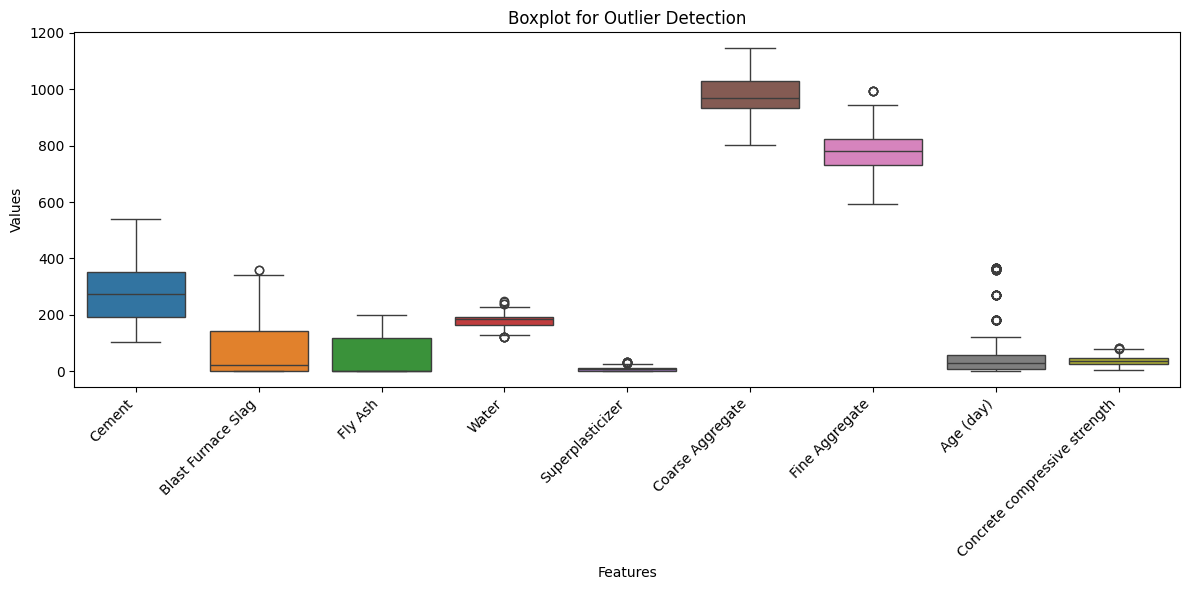

In [ ]:
# Visualizing the data to detect outliers

plt.figure(figsize=(12, 6)) # Increased width slightly for more space
sns.boxplot(data=df) # Assuming 'df' is your DataFrame, loaded elsewhere

plt.title('Boxplot for Outlier Detection')
plt.xlabel('Features') 
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

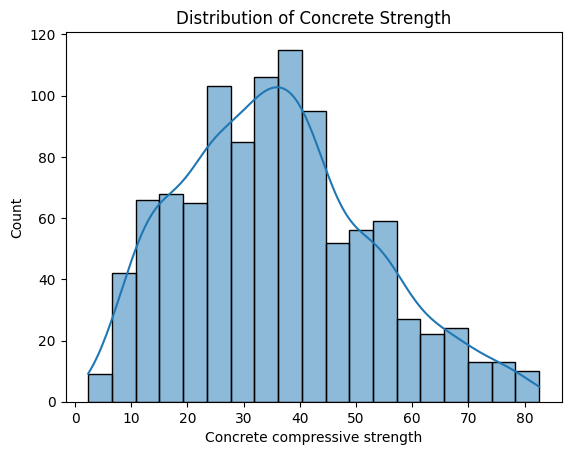

In [14]:
sns.histplot(df['Concrete compressive strength'], kde=True)
plt.title('Distribution of Concrete Strength')
plt.show()


In [13]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225
